In [1]:
#!python -m spacy download es_core_news_sm
#!python -m spacy_spanish_lemmatizer download wiki

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
import pandas as pd
from resources.text_dataset_analytics import TextDatasetAnalyzer
from resources.text_pattern_analytics import TextPatternAnalyzer
from resources.utils import preprocess_dataframe


[nltk_data] Downloading package punkt to /Users/amosluna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/amosluna/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amosluna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
path_files = [
    "../data/data_extracted_topic_1_12022025.json",
    "../data/data_extracted_topic_2_12022025.json",
    "../data/data_extracted_topic_3_12022025.json",
]

In [4]:
df_list = []
for path in path_files:
    try:
        df = pd.read_json(path, encoding="utf-8") 
        df_list.append(df) 
    except Exception as e:
        print(f"Error reading {path}: {e}")

df_concat = pd.concat(df_list, ignore_index=True)
df_concat.head()

,query,direct_snippet,url,full_title,full_content
0,¿Qué nivel de aprobación tiene actualmente la ...,César Acuña resaltó que la aprobación de la pr...,https://larepublica.pe/sociedad/2024/12/02/nom...,[Error] Web request failed: 403 Client Error: ...,"El gobernador regional de La Libertad, César A..."
1,¿Qué nivel de aprobación tiene actualmente la ...,"La presidenta de la República, Dina Boluarte, ...",https://peru21.pe/politica/dina-boluarte-vuelv...,[Error] Web request failed: 403 Client Error: ...,"La presidenta de la República, Dina Boluarte, ..."
2,¿Qué nivel de aprobación tiene actualmente la ...,La presidenta Dina Boluarte enfrenta una grave...,https://larepublica.pe/politica/2024/12/25/din...,[Error] Web request failed: 403 Client Error: ...,Dina Boluarte enfrenta récords negativos de ap...
3,¿Qué nivel de aprobación tiene actualmente la ...,Dina Boluarte espera que otra mujer sea elegid...,https://www.infobae.com/peru/2025/02/11/dina-b...,Dina Boluarte espera que otra mujer sea elegid...,Dina Boluarte espera que otra mujer sea elegid...
4,¿Qué nivel de aprobación tiene actualmente la ...,"La aprobación de la presidenta de Perú, ... el...",https://actualidad.rt.com/actualidad/530748-ap...,La aprobación de Dina Boluarte cae a mínimos h...,La aprobación de Dina Boluarte cae a mínimos h...


# CLEANING AND PROCESSING DATA

In [5]:
df_processed = preprocess_dataframe(df_concat, 'full_content')
df_processed

,query,direct_snippet,url,full_title,full_content,cleaned_text,tokens,no_stopwords,stemmed,lemmatized,final_text
0,¿Qué nivel de aprobación tiene actualmente la ...,César Acuña resaltó que la aprobación de la pr...,https://larepublica.pe/sociedad/2024/12/02/nom...,[Error] Web request failed: 403 Client Error: ...,"El gobernador regional de La Libertad, César A...",el gobernador regional de la libertad césar ac...,"[el, gobernador, regional, de, la, libertad, c...","[gobernador, regional, libertad, césar, acuña,...","[gobern, regional, libert, ces, acuñ, propus, ...","[gobern, regional, libert, ces, acuñ, propus, ...",gobern regional libert ces acuñ propus año den...
1,¿Qué nivel de aprobación tiene actualmente la ...,"La presidenta de la República, Dina Boluarte, ...",https://peru21.pe/politica/dina-boluarte-vuelv...,[Error] Web request failed: 403 Client Error: ...,"La presidenta de la República, Dina Boluarte, ...",la presidenta de la república dina boluarte vo...,"[la, presidenta, de, la, república, dina, bolu...","[presidenta, república, dina, boluarte, volvió...","[president, republ, din, boluart, volv, minimi...","[president, republ, din, boluart, volv, minimi...",president republ din boluart volv minimiz vier...
2,¿Qué nivel de aprobación tiene actualmente la ...,La presidenta Dina Boluarte enfrenta una grave...,https://larepublica.pe/politica/2024/12/25/din...,[Error] Web request failed: 403 Client Error: ...,Dina Boluarte enfrenta récords negativos de ap...,dina boluarte enfrenta récords negativos de ap...,"[dina, boluarte, enfrenta, récords, negativos,...","[dina, boluarte, enfrenta, récords, negativos,...","[din, boluart, enfrent, records, negat, aprob,...","[din, boluart, enfrent, record, negat, aprob, ...",din boluart enfrent record negat aprob com pre...
3,¿Qué nivel de aprobación tiene actualmente la ...,Dina Boluarte espera que otra mujer sea elegid...,https://www.infobae.com/peru/2025/02/11/dina-b...,Dina Boluarte espera que otra mujer sea elegid...,Dina Boluarte espera que otra mujer sea elegid...,dina boluarte espera que otra mujer sea elegid...,"[dina, boluarte, espera, que, otra, mujer, sea...","[dina, boluarte, espera, mujer, elegida, presi...","[din, boluart, esper, muj, eleg, president, pe...","[din, boluart, esper, muj, eleg, president, pe...",din boluart esper muj eleg president peru elec...
4,¿Qué nivel de aprobación tiene actualmente la ...,"La aprobación de la presidenta de Perú, ... el...",https://actualidad.rt.com/actualidad/530748-ap...,La aprobación de Dina Boluarte cae a mínimos h...,La aprobación de Dina Boluarte cae a mínimos h...,la aprobación de dina boluarte cae a mínimos h...,"[la, aprobación, de, dina, boluarte, cae, a, m...","[aprobación, dina, boluarte, cae, mínimos, his...","[aprob, din, boluart, cae, min, histor, peru, ...","[aprob, din, boluart, caer, min, histor, peru,...",aprob din boluart caer min histor peru aprob p...
...,...,...,...,...,...,...,...,...,...,...,...
93,Visiones a futuro y escenarios políticos poten...,El futuro y los escenarios políticos-económico...,https://issuu.com/magazine_virtual_educa/docs/...,[Error] Web request failed: 406 Client Error: ...,Resources Dive into our extensive resources on...,resources dive into our extensive resources on...,"[resources, dive, into, our, extensive, resour...","[resources, dive, into, our, extensive, resour...","[resourc, div, into, our, extensiv, resourc, o...","[resourc, div, into, our, extensiv, resourc, o...",resourc div into our extensiv resourc on the t...
94,Visiones a futuro y escenarios políticos poten...,El proceso electoral se acerca a gran velocida...,https://elreporte.pe/2025/02/09/que-nos-espera...,¿Qué nos espera para el 2026? - El Reporte,El proceso electoral se acerca a gran velocida...,el proceso electoral se acerca a gran velocida...,"[el, proceso, electoral, se, acerca, a, gran, ...","[proceso, electoral, acerca, gran, velocidad, ...","[proces, electoral, acerc, gran, veloc, peru, ...","[proz, electoral,

# DATASET ANALYZER

In [6]:
analyzer = TextDatasetAnalyzer(
    df_processed, 
    text_column="final_text"
)
analyzer.run_full_analysis()


--- General Information ---
Total number of examples: 98

Main characteristics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   query           98 non-null     object
 1   direct_snippet  98 non-null     object
 2   url             98 non-null     object
 3   full_title      98 non-null     object
 4   full_content    98 non-null     object
 5   cleaned_text    98 non-null     object
 6   tokens          98 non-null     object
 7   no_stopwords    98 non-null     object
 8   stemmed         98 non-null     object
 9   lemmatized      98 non-null     object
 10  final_text      98 non-null     object
dtypes: object(11)
memory usage: 8.5+ KB
None

Average number of words per example: 649.98

Vocabulary size: 6196

Most frequent words:
polit: 1275
econom: 662
pais: 418
evalu: 401
public: 391
president: 381
pued: 376
part: 359
riesg: 349
gobie

# FINDING PATTERNS 

In [11]:
text_column = "final_text" 

analyzer = TextPatternAnalyzer(df_processed, text_column)
df_analyzed = analyzer.run_full_analysis()


Extracting Named Entities...

Extracting POS Tags...

Performing Sentiment Analysis...

Analysis Completed!


In [12]:
df_analyzed[['final_text', 'named_entities', 'pos_tags', 'sentiment', 'sentiment_label']].head(20)

,final_text,named_entities,pos_tags,sentiment,sentiment_label
0,gobern regional libert ces acuñ propus año den...,"[(gobern regional, LOC), (año bicentenari jos ...","[(gobern, PROPN), (regional, ADJ), (libert, PR...",0.000000,neutral
1,president republ din boluart volv minimiz vier...,"[(president republ, PER), (minimiz, PER), (apr...","[(president, NOUN), (republ, VERB), (din, ADP)...",0.012500,positive
2,din boluart enfrent record negat aprob com pre...,"[(boluart enfrent, MISC), (aprob, PER), (gerso...","[(din, NUM), (boluart, NOUN), (enfrent, ADJ), ...",0.085606,positive
3,din boluart esper muj eleg president peru elec...,"[(din boluart esper, PER), (republ, PER), (bol...","[(din, NUM), (boluart, NOUN), (esper, ADJ), (m...",0.080952,positive
4,aprob din boluart caer min histor peru aprob p...,"[(aprob din boluart, PER), (ubic establec, PER...","[(aprob, VERB), (din, VERB), (boluart, NOUN), ...",0.000000,neutral
5,sondir mensual empr datum registr liger caid a...,"[(aprob boluart, PER), (mund, LOC), (comenz en...","[(sondir, VERB), (mensual, ADJ), (empr, NOUN),...",-0.091667,negative
6,president peru registr porcentaj baj aprob lle...,"[(president peru registr porcentaj, ORG), (apr...","[(president, NOUN), (peru, VERB), (registr, AD...",-0.018750,negative
7,continu tendenci baj din boluart president peo...,"[(continu, MISC), (cid gallup men seis, PER), ...","[(continu, NOUN), (tendenci, ADJ), (baj, ADV),...",0.000000,neutral
8,plar congres aprob ley presupuest public año f...,"[(ley presupuest, LOC), (millon represent incr...","[(plar, VERB), (congres, NOUN), (aprob, VERB),...",0.090278,positive
9,aprob president din boluart encuentr suel sig ...,"[(aprob, MISC), (suel sig marc, PER), (consegu...","[(aprob, VERB), (president, ADJ), (din, VERB),...",-0.100000,negative


# ADVANCED ANALYTICSC

Device set to use mps:0


Performing Sentiment Analysis using BERT...

Sentiment Distribution:
sentiment
1 star     72
4 stars    12
2 stars    10
5 stars     3
3 stars     1
Name: count, dtype: int64


/Users/amosluna/Desktop/diplomado_ia_pucp/final_projects/mod_2/npl_final_challenge/resources/advanced_text_pattern_analyzer.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


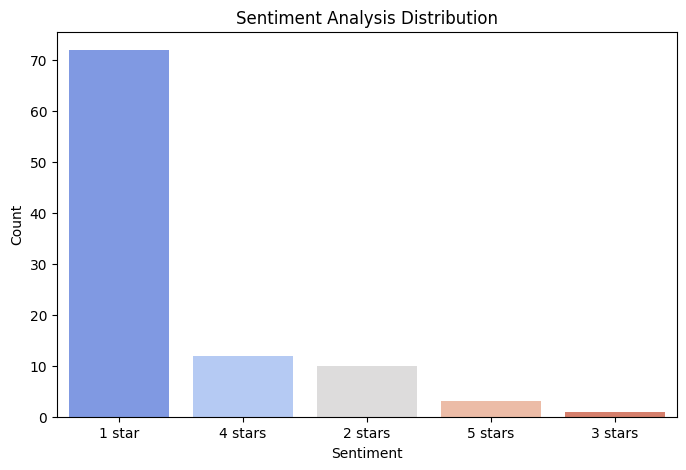

In [6]:
from resources.advanced_text_pattern_analyzer import AdvancedTextAnalyzer


analyzer = AdvancedTextAnalyzer(df_processed, 'final_text')
analyzer.run_full_advanced_analysis()